In [1]:
# 2. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load dataset

df = pd.read_csv('/content/drive/MyDrive/kaggle/user_behavior_dataset.csv')

# Quick overview
print(df.shape)
print(df.head())
print(df.info())

# Basic stats
print(df.describe())


(700, 11)
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2      

In [ ]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
# Rename columns for easier coding
df.columns = [
    'user_id', 'device_model', 'os', 'app_usage_min', 'screen_on_hr',
    'battery_mAh', 'num_apps', 'data_mb', 'age', 'gender', 'behavior_class'
]

In [ ]:
# Quick checks
print(df.isnull().sum())  # Missing values

user_id           0
device_model      0
os                0
app_usage_min     0
screen_on_hr      0
battery_mAh       0
num_apps          0
data_mb           0
age               0
gender            0
behavior_class    0
dtype: int64


In [ ]:
print(df.describe())      # Summary stats

         user_id  app_usage_min  screen_on_hr  battery_mAh    num_apps  \
count  700.00000     700.000000    700.000000   700.000000  700.000000   
mean   350.50000     271.128571      5.272714  1525.158571   50.681429   
std    202.21688     177.199484      3.068584   819.136414   26.943324   
min      1.00000      30.000000      1.000000   302.000000   10.000000   
25%    175.75000     113.250000      2.500000   722.250000   26.000000   
50%    350.50000     227.500000      4.900000  1502.500000   49.000000   
75%    525.25000     434.250000      7.400000  2229.500000   74.000000   
max    700.00000     598.000000     12.000000  2993.000000   99.000000   

           data_mb         age  behavior_class  
count   700.000000  700.000000      700.000000  
mean    929.742857   38.482857        2.990000  
std     640.451729   12.012916        1.401476  
min     102.000000   18.000000        1.000000  
25%     373.000000   28.000000        2.000000  
50%     823.500000   38.000000        3

In [ ]:
print(df['behavior_class'].value_counts())  # Distribution of user classes

behavior_class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


In [ ]:
#1. Engagement Metrics
# Average app usage and screen time
engagement_summary = df[['app_usage_min', 'screen_on_hr', 'num_apps', 'data_mb']].mean()
print(engagement_summary)

app_usage_min    271.128571
screen_on_hr       5.272714
num_apps          50.681429
data_mb          929.742857
dtype: float64


In [ ]:
#2. User Segmentation by Behavior Class
# Average stats per behavior class
segmentation = df.groupby('behavior_class')[['app_usage_min', 'screen_on_hr', 'num_apps', 'data_mb']].mean()
print(segmentation)

                app_usage_min  screen_on_hr   num_apps      data_mb
behavior_class                                                     
1                   60.426471      1.490441  14.558824   202.323529
2                  131.972603      3.037671  30.753425   451.417808
3                  235.398601      4.955944  50.000000   822.013986
4                  395.748201      6.909353  69.920863  1232.230216
5                  541.419118     10.114706  89.250000  1974.772059


In [ ]:
#3. Power User Definition (Top 20% by App Usage)
df['power_user'] = df['app_usage_min'] > df['app_usage_min'].quantile(0.8)
power_user_pct = df['power_user'].mean() * 100
print(f"Power users: {power_user_pct:.2f}% of users")

Power users: 19.71% of users


In [ ]:
#4. Engagement Index (Composite Metric)
# Normalize and weight
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features = df[['app_usage_min', 'screen_on_hr', 'num_apps', 'data_mb']]
scaled = scaler.fit_transform(features)

df['engagement_index'] = (
    0.4 * scaled[:, 0] +  # app usage
    0.3 * scaled[:, 1] +  # screen time
    0.2 * scaled[:, 2] +  # number of apps
    0.1 * scaled[:, 3]    # data usage
)
print(df[['user_id', 'engagement_index']].head())


   user_id  engagement_index
0        1          0.573585
1        2          0.375581
2        3          0.227766
3        4          0.386299
4        5          0.345422


In [ ]:
#5. Segment by OS & Gender
os_gender_segmentation = df.groupby(['os', 'gender'])[['app_usage_min', 'screen_on_hr']].mean()
print(os_gender_segmentation)


                app_usage_min  screen_on_hr
os      gender                             
Android Female     268.026718      5.200000
        Male       268.465753      5.258904
iOS     Female     285.918919      5.478378
        Male       278.013889      5.381944


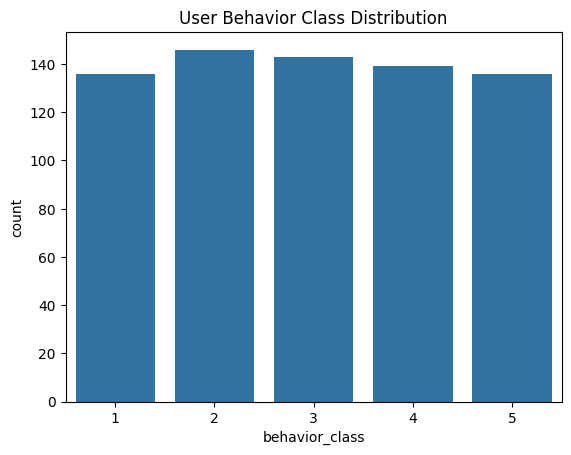

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Behavior class distribution
sns.countplot(x='behavior_class', data=df)
plt.title("User Behavior Class Distribution")
plt.show()

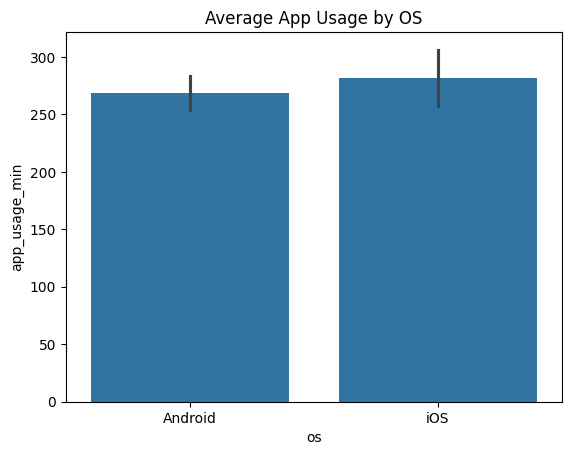

In [ ]:
# 2. Average app usage by OS
sns.barplot(x='os', y='app_usage_min', data=df)
plt.title("Average App Usage by OS")
plt.show()

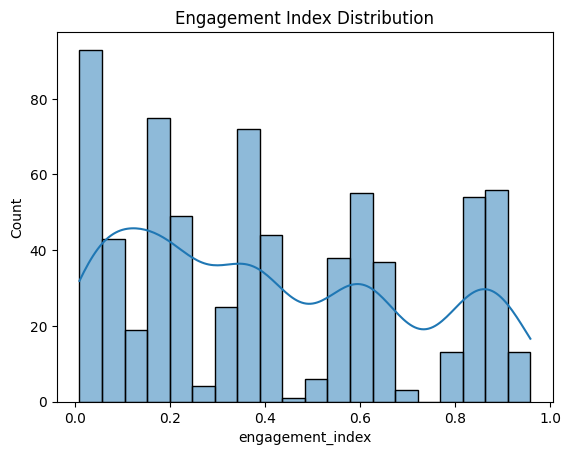

In [ ]:
# 3. Engagement index histogram
sns.histplot(df['engagement_index'], bins=20, kde=True)
plt.title("Engagement Index Distribution")
plt.show()

In [ ]:
import pandas as pd

# Stage flags
df['activated'] = df['app_usage_min'] > 60
df['engaged'] = df['screen_on_hr'] > 4
df['retained'] = df['behavior_class'] >= 4

# Funnel counts
funnel_counts = {
    'total_users': len(df),
    'activated': df['activated'].sum(),
    'engaged': df['engaged'].sum(),
    'retained': df['retained'].sum()
}

# Funnel conversion rates
funnel_rates = {
    'activation_rate': funnel_counts['activated'] / funnel_counts['total_users'],
    'engagement_rate': funnel_counts['engaged'] / funnel_counts['activated'],
    'retention_rate': funnel_counts['retained'] / funnel_counts['engaged']
}

print("Funnel Counts:")
print(funnel_counts)
print("\nFunnel Conversion Rates:")
print(funnel_rates)


Funnel Counts:
{'total_users': 700, 'activated': np.int64(637), 'engaged': np.int64(410), 'retained': np.int64(275)}

Funnel Conversion Rates:
{'activation_rate': np.float64(0.91), 'engagement_rate': np.float64(0.6436420722135008), 'retention_rate': np.float64(0.6707317073170732)}


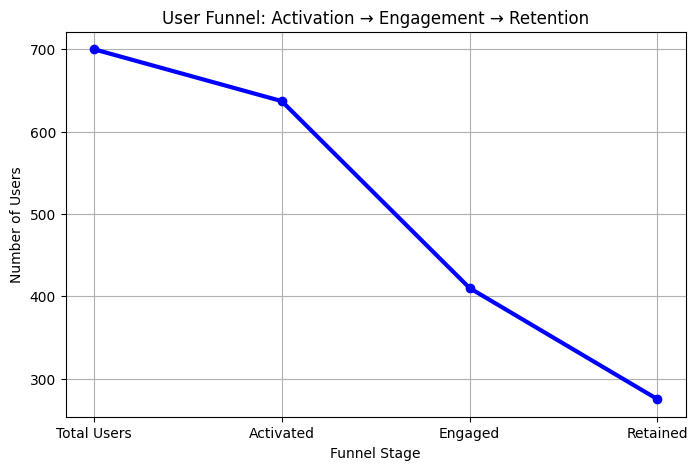

In [ ]:
import matplotlib.pyplot as plt

stages = ['Total Users', 'Activated', 'Engaged', 'Retained']
counts = [funnel_counts['total_users'], funnel_counts['activated'],
          funnel_counts['engaged'], funnel_counts['retained']]

plt.figure(figsize=(8,5))
plt.plot(stages, counts, marker='o', linewidth=3, color='blue')
plt.title("User Funnel: Activation → Engagement → Retention")
plt.xlabel("Funnel Stage")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()


Let’s segment the funnel by Operating System (os) and Gender (gender) to see which groups are performing better at each stage.

🛠 Funnel Segmentation Code

In [ ]:
import pandas as pd

# Define function to calculate funnel metrics per group
def calculate_funnel(df_group):
    total = len(df_group)
    activated = df_group['activated'].sum()
    engaged = df_group['engaged'].sum()
    retained = df_group['retained'].sum()

    return pd.Series({
        'total_users': total,
        'activated': activated,
        'engaged': engaged,
        'retained': retained,
        'activation_rate': activated / total if total > 0 else 0,
        'engagement_rate': engaged / activated if activated > 0 else 0,
        'retention_rate': retained / engaged if engaged > 0 else 0
    })

# Group by OS and Gender
funnel_by_os_gender = df.groupby(['os', 'gender']).apply(calculate_funnel).reset_index()
print(funnel_by_os_gender)


        os  gender  total_users  activated  engaged  retained  \
0  Android  Female        262.0      234.0    158.0      96.0   
1  Android    Male        292.0      265.0    162.0     119.0   
2      iOS  Female         74.0       71.0     48.0      31.0   
3      iOS    Male         72.0       67.0     42.0      29.0   

   activation_rate  engagement_rate  retention_rate  
0         0.893130         0.675214        0.607595  
1         0.907534         0.611321        0.734568  
2         0.959459         0.676056        0.645833  
3         0.930556         0.626866        0.690476  


/tmp/ipython-input-2782029103.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  funnel_by_os_gender = df.groupby(['os', 'gender']).apply(calculate_funnel).reset_index()


📊 Funnel Segmentation Visualization
1. Activation Rate by OS and Gender

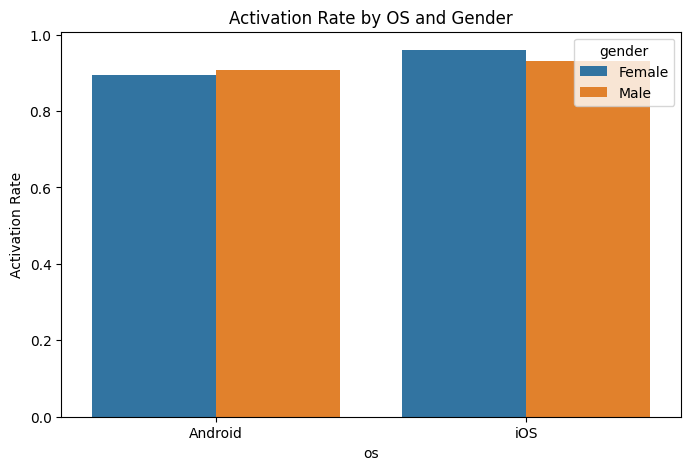

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='os', y='activation_rate', hue='gender', data=funnel_by_os_gender)
plt.title("Activation Rate by OS and Gender")
plt.ylabel("Activation Rate")
plt.show()

2. Retention Rate by OS and Gender

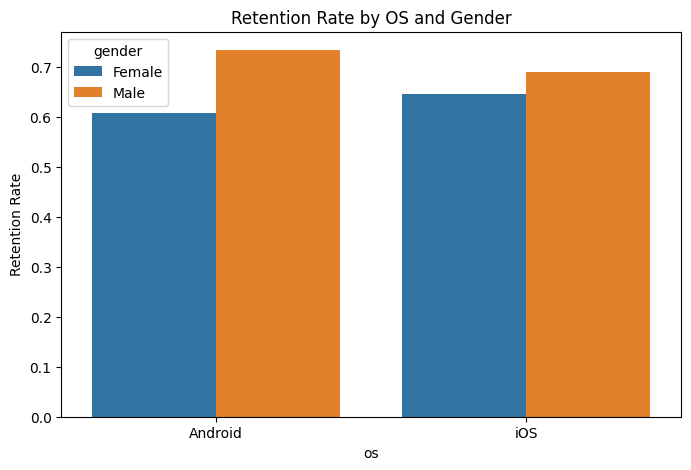

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='os', y='retention_rate', hue='gender', data=funnel_by_os_gender)
plt.title("Retention Rate by OS and Gender")
plt.ylabel("Retention Rate")
plt.show()

simulate a retention curve based on engagement_index to mimic Day 1, Day 7, Day 30 retention—just like a real PLG dashboard. Since there is no actual timestamps, we’ll simulate retention curves using the engagement_index as a proxy for likelihood of retention over time. Higher engagement_index → higher probability of “staying active” over 30 days.

Simulated Retention Curve Code

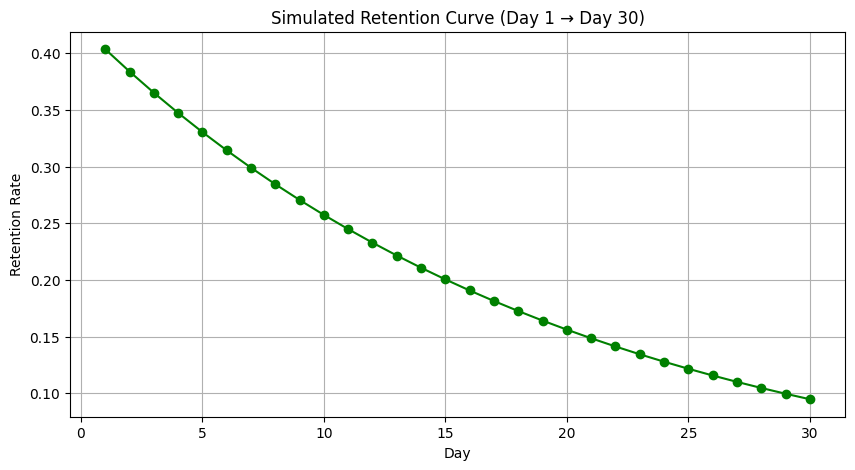

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate retention probability based on engagement_index
# Scale engagement_index to 0-1
df['engagement_scaled'] = (df['engagement_index'] - df['engagement_index'].min()) / (df['engagement_index'].max() - df['engagement_index'].min())

# Function to simulate retention over 30 days
def simulate_retention(prob, days=30):
    retention = []
    for day in range(1, days+1):
        # Users "churn" probabilistically based on inverse of engagement score
        retained_today = prob * np.exp(-0.05 * day)  # decay rate 0.05/day
        retention.append(retained_today.mean())
    return retention

retention_curve = simulate_retention(df['engagement_scaled'], days=30)

# Plot retention curve
plt.figure(figsize=(10,5))
plt.plot(range(1,31), retention_curve, marker='o', color='green')
plt.title("Simulated Retention Curve (Day 1 → Day 30)")
plt.xlabel("Day")
plt.ylabel("Retention Rate")
plt.grid(True)
plt.show()


Users with higher engagement_index are more likely to “stay” each day.

Retention decays over time like a real app (exponential decay).

Day 1 → Day 30 retention curve mimics real PLG SaaS dashboards.

Now, let's split this simulated retention curve by OS, gender, or behavior class to see which segments retain better.

Example: Retention by behavior class:

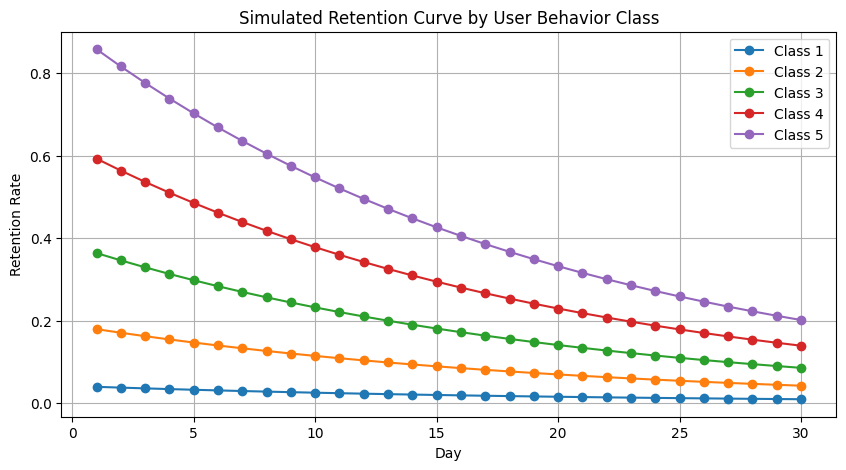

In [ ]:
retention_by_class = {}
for cls in sorted(df['behavior_class'].unique()):
    subset = df[df['behavior_class'] == cls]
    retention_by_class[cls] = simulate_retention((subset['engagement_scaled']), days=30)

plt.figure(figsize=(10,5))
for cls, curve in retention_by_class.items():
    plt.plot(range(1,31), curve, marker='o', label=f'Class {cls}')

plt.title("Simulated Retention Curve by User Behavior Class")
plt.xlabel("Day")
plt.ylabel("Retention Rate")
plt.legend()
plt.grid(True)
plt.show()


Now, let's combine all these metrics into a single dashboard table ready for Tableau/Metabase, showing:

*  Total users
*  Activation %, Engagement %, Retention %
*  Average engagement index per segment
*  OS/gender/behavior class breakdown
*  List item

Let's aggregate by OS, Gender, and Behavior Class, including:

* Total users
* Activated, Engaged, Retained counts
* Funnel conversion rates
* Average engagement index

In [ ]:
import pandas as pd

# Group by OS, Gender, Behavior Class
group_cols = ['os', 'gender', 'behavior_class']

def dashboard_metrics(group):
    total = len(group)
    activated = group['activated'].sum()
    engaged = group['engaged'].sum()
    retained = group['retained'].sum()
    avg_engagement = group['engagement_index'].mean()

    return pd.Series({
        'total_users': total,
        'activated': activated,
        'engaged': engaged,
        'retained': retained,
        'activation_rate': activated / total if total > 0 else 0,
        'engagement_rate': engaged / activated if activated > 0 else 0,
        'retention_rate': retained / engaged if engaged > 0 else 0,
        'avg_engagement_index': avg_engagement
    })

dashboard_table = df.groupby(group_cols).apply(dashboard_metrics).reset_index()

# Display the table
print(dashboard_table.head())

        os  gender  behavior_class  total_users  activated  engaged  retained  \
0  Android  Female               1         53.0       25.0      0.0       0.0   
1  Android  Female               2         49.0       49.0      0.0       0.0   
2  Android  Female               3         64.0       64.0     62.0       0.0   
3  Android  Female               4         51.0       51.0     51.0      51.0   
4  Android  Female               5         45.0       45.0     45.0      45.0   

   activation_rate  engagement_rate  retention_rate  avg_engagement_index  
0         0.471698          0.00000             0.0              0.049441  
1         1.000000          0.00000             0.0              0.183230  
2         1.000000          0.96875             0.0              0.374180  
3         1.000000          1.00000             1.0              0.606164  
4         1.000000          1.00000             1.0              0.876001  


/tmp/ipython-input-3204779439.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dashboard_table = df.groupby(group_cols).apply(dashboard_metrics).reset_index()
